# Análise Inicial Tweets

In [71]:
import ipy_table
import re
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np

%run ../aux/postgres.py

postgres functions loaded...


## Total coletado via streamming api:

In [60]:
cod = '36'
cmd = "select descricao from projeto where codprojeto = " + cod
res = query(cmd)
print(res[0][0])

cmd = "select count(*) from tweet where codprojeto = " + cod
res = query(cmd)
print("{:,}".format(res[0][0]).replace(',','.'))

Eleições 2018 (api)
47.349.870


In [61]:
cod = '36'
cmd = ("SELECT "
       "to_char(datatweet, 'YYYY-MM') as data, "
       "count(codtweet) AS tweet "
       "FROM tweet "
       "WHERE codprojeto = " + cod + " "
       "GROUP BY 1"
       "ORDER BY 1"
      )
res = query(cmd)

In [62]:
res

[('2018-10', 47100064), ('2018-11', 249806)]

In [66]:
cod = '36'
cmd = ("SELECT "
       "datatweet as data, "
       "count(codtweet) AS tweet "
       "FROM tweet "
       "WHERE codprojeto = " + cod + " "
       "AND datatweet BETWEEN '2018-10-01' AND '2018-10-31' "
       "GROUP BY 1"
       "ORDER BY 1"
      )
res1 = query(cmd)

In [96]:
cmd = ("INSERT INTO amostratweet (codamostra, codtweet) " +
       "SELECT 130, t.codtweet " +
       "FROM tweet t " +
       "WHERE t.codprojeto = 36 " +
       "AND datatweet BETWEEN '2018-10-01' AND '2018-10-31' ")
execSQL(cmd)

In [97]:
cmd = "select count(*) from amostratweet where codamostra = 130"
res2 = query(cmd)
res2

[(47100064,)]

In [67]:
res1

[(datetime.date(2018, 10, 1), 592822),
 (datetime.date(2018, 10, 2), 1378046),
 (datetime.date(2018, 10, 3), 1117395),
 (datetime.date(2018, 10, 4), 1175614),
 (datetime.date(2018, 10, 5), 1470282),
 (datetime.date(2018, 10, 6), 1094811),
 (datetime.date(2018, 10, 7), 1872461),
 (datetime.date(2018, 10, 8), 2644180),
 (datetime.date(2018, 10, 9), 1791208),
 (datetime.date(2018, 10, 10), 1807450),
 (datetime.date(2018, 10, 11), 1689248),
 (datetime.date(2018, 10, 12), 1414978),
 (datetime.date(2018, 10, 13), 1232011),
 (datetime.date(2018, 10, 14), 1109438),
 (datetime.date(2018, 10, 15), 1268985),
 (datetime.date(2018, 10, 16), 1344505),
 (datetime.date(2018, 10, 17), 1151850),
 (datetime.date(2018, 10, 18), 1611005),
 (datetime.date(2018, 10, 19), 1810186),
 (datetime.date(2018, 10, 20), 1358818),
 (datetime.date(2018, 10, 21), 1234886),
 (datetime.date(2018, 10, 22), 1245830),
 (datetime.date(2018, 10, 23), 1605055),
 (datetime.date(2018, 10, 24), 1552116),
 (datetime.date(2018, 10, 

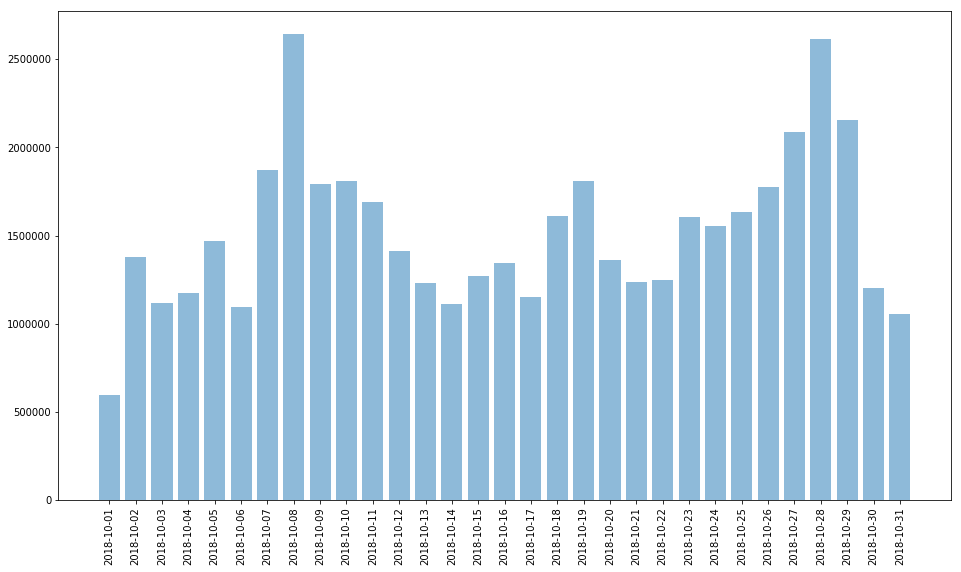

In [68]:
y = [ x[0] for x in res1 ]
x = [ x[1] for x in res1 ]
y_pos = np.arange(len(y))

plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, y, rotation='vertical')
#plt.ylabel('Usage')
#plt.title('Programming language usage')
#fig_size = plt.rcParams["figure.figsize"]
#print("Current size:", fig_size)
#fig_size[0] = 16
#fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size    
    
plt.show()

In [93]:
cmap = mp.colors.LinearSegmentedColormap.from_list('custom blue', ['#56B1F7','#ff0000'], N=256)

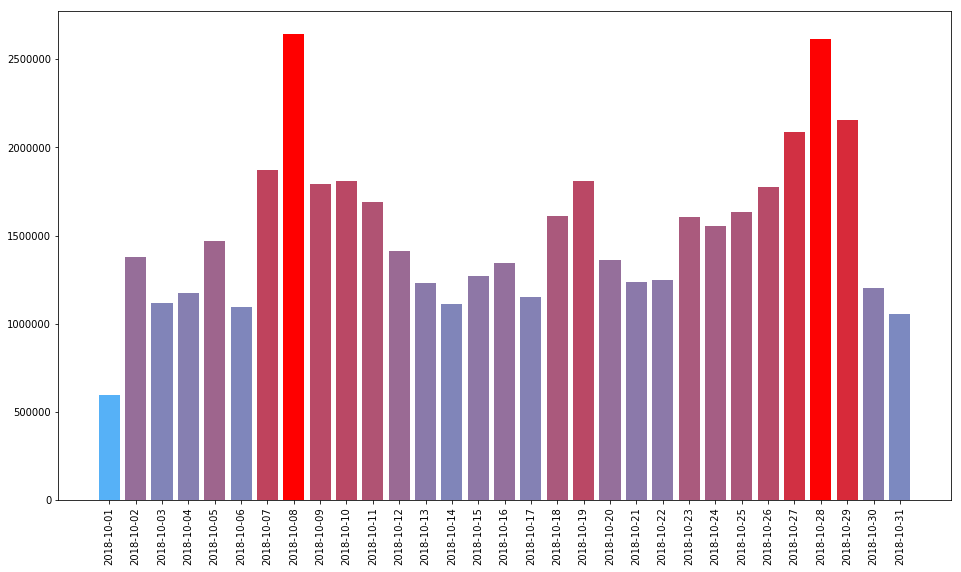

In [94]:
data = x
 
# Colorize the graph based on likeability:
likeability_scores = np.array(data)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)
 
# Map xs to numbers:
N = len(data)
x_nums = np.arange(1, N+1)
 
# Plot a bar graph:
plt.bar(
    x_nums,
    data,
    align="center",
    color=cmap(data_normalizer(likeability_scores))
)
plt.xticks(x_nums, y, rotation='vertical')
#plt.xticks(x_nums, data, rotation='vertical')
plt.show()

## Total coletado via TweetScrapy (coletor retroativo):

In [16]:
cod = '34'
cmd = "select descricao, observacao from projeto where codprojeto = " + cod
res = query(cmd)
print(res[0][0] + " - " + res[0][1])

cmd = "select count(*) from tweet where codprojeto = " + cod
res = query(cmd)
print("{:,}".format(res[0][0]).replace(',','.'))

Eleições 2018 (tweets) - Coletados via TweetScrapy
552.538


In [27]:
cod = '34'
cmd = ("SELECT "
       "to_char(datatweet, 'YYYY-MM') as data, "
       "count(codtweet) AS tweet "
       "FROM tweet "
       "WHERE codprojeto = " + cod + " "
       "GROUP BY 1"
       "ORDER BY 1"
      )
res = query(cmd)

In [28]:
res

[('2010-07', 2),
 ('2010-10', 2),
 ('2010-11', 3),
 ('2011-01', 1),
 ('2011-03', 1),
 ('2011-07', 3),
 ('2011-08', 1),
 ('2011-09', 5),
 ('2011-10', 1),
 ('2011-11', 1),
 ('2012-01', 1),
 ('2012-02', 2),
 ('2012-03', 1),
 ('2012-05', 1),
 ('2012-09', 1),
 ('2012-10', 1),
 ('2013-01', 1),
 ('2013-04', 2),
 ('2013-05', 2),
 ('2013-07', 1),
 ('2013-08', 2),
 ('2013-09', 2),
 ('2013-12', 2),
 ('2014-01', 1),
 ('2014-05', 2),
 ('2014-07', 1),
 ('2014-09', 3),
 ('2014-10', 1),
 ('2014-12', 1),
 ('2015-01', 1),
 ('2015-02', 1),
 ('2015-04', 1),
 ('2015-08', 2),
 ('2016-02', 1),
 ('2016-06', 1),
 ('2016-09', 1),
 ('2016-12', 1),
 ('2017-02', 1),
 ('2017-06', 1),
 ('2018-05', 1),
 ('2018-06', 1),
 ('2018-09', 517302),
 ('2018-10', 35175)]

## Amostras Geradas

In [9]:
cod = '100'
cmd = "select descricao from amostra where codamostra = " + cod
res = query(cmd)
print(res[0][0])
cmd = "select count(*) from amostratweet tweet where codamostra = " + cod
res = query(cmd)
print("{:,}".format(res[0][0]).replace(',','.'))

Eleições Retroativo
552.538


In [11]:
cod = '102'
cmd = "select descricao from amostra where codamostra = " + cod
res = query(cmd)
print(res[0][0])
cmd = "select count(*) from amostratweet tweet where codamostra = " + cod
res = query(cmd)
print("{:,}".format(res[0][0]).replace(',','.'))

Eleições Tweets Notícias
207.355


In [19]:
cod = '99'
cmd = "select descricao from amostra where codamostra = " + cod
res = query(cmd)
print(res[0][0])
cmd = "select count(*) from amostratweet tweet where codamostra = " + cod
res = query(cmd)
print("{:,}".format(res[0][0]).replace(',','.'))

Eleições [retroativo + api]
24.411.949


In [31]:
cod = '99'
cmd = ("SELECT "
       "to_char(t.datatweet, 'YYYY-MM') as data, "
       "count(at.codtweet) AS tweet "
       "FROM amostratweet at "
       "INNER JOIN tweet t ON at.codtweet = t.codtweet "
       "WHERE codamostra = " + cod + " "
       "GROUP BY 1"
       "ORDER BY 1"
      )
res = query(cmd)

In [32]:
res

[('2010-07', 2),
 ('2010-10', 2),
 ('2010-11', 3),
 ('2011-01', 1),
 ('2011-03', 1),
 ('2011-07', 3),
 ('2011-08', 1),
 ('2011-09', 5),
 ('2011-10', 1),
 ('2011-11', 1),
 ('2012-01', 1),
 ('2012-02', 2),
 ('2012-03', 1),
 ('2012-05', 1),
 ('2012-09', 1),
 ('2012-10', 1),
 ('2013-01', 1),
 ('2013-04', 2),
 ('2013-05', 2),
 ('2013-07', 1),
 ('2013-08', 2),
 ('2013-09', 2),
 ('2013-12', 2),
 ('2014-01', 1),
 ('2014-05', 2),
 ('2014-07', 1),
 ('2014-09', 3),
 ('2014-10', 1),
 ('2014-12', 1),
 ('2015-01', 1),
 ('2015-02', 1),
 ('2015-04', 1),
 ('2015-08', 2),
 ('2016-02', 1),
 ('2016-06', 1),
 ('2016-09', 1),
 ('2016-12', 1),
 ('2017-02', 1),
 ('2017-06', 1),
 ('2018-05', 1),
 ('2018-06', 1),
 ('2018-09', 517302),
 ('2018-10', 23894586)]

In [35]:
cod = '99'
cmd = ("SELECT "
       "t.datatweet as data, "
       "count(at.codtweet) AS tweet "
       "FROM amostratweet at "
       "INNER JOIN tweet t ON at.codtweet = t.codtweet "
       "WHERE codamostra = " + cod + " "
       "GROUP BY 1"
       "ORDER BY 1"
      )
res = query(cmd)

In [36]:
res

[(datetime.date(2010, 7, 13), 1),
 (datetime.date(2010, 7, 31), 1),
 (datetime.date(2010, 10, 3), 1),
 (datetime.date(2010, 10, 6), 1),
 (datetime.date(2010, 11, 4), 1),
 (datetime.date(2010, 11, 8), 1),
 (datetime.date(2010, 11, 24), 1),
 (datetime.date(2011, 1, 23), 1),
 (datetime.date(2011, 3, 22), 1),
 (datetime.date(2011, 7, 10), 1),
 (datetime.date(2011, 7, 11), 1),
 (datetime.date(2011, 7, 17), 1),
 (datetime.date(2011, 8, 10), 1),
 (datetime.date(2011, 9, 6), 1),
 (datetime.date(2011, 9, 8), 2),
 (datetime.date(2011, 9, 17), 1),
 (datetime.date(2011, 9, 18), 1),
 (datetime.date(2011, 10, 30), 1),
 (datetime.date(2011, 11, 24), 1),
 (datetime.date(2012, 1, 28), 1),
 (datetime.date(2012, 2, 7), 1),
 (datetime.date(2012, 2, 12), 1),
 (datetime.date(2012, 3, 9), 1),
 (datetime.date(2012, 5, 4), 1),
 (datetime.date(2012, 9, 11), 1),
 (datetime.date(2012, 10, 30), 1),
 (datetime.date(2013, 1, 9), 1),
 (datetime.date(2013, 4, 13), 1),
 (datetime.date(2013, 4, 29), 1),
 (datetime.date(

Current size: [16.0, 9.0]


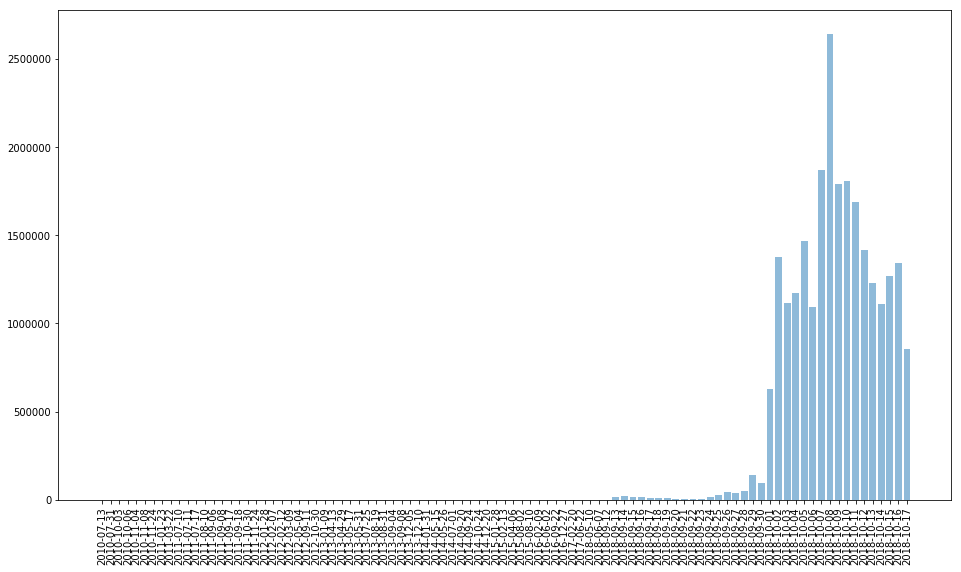

In [58]:
y = [ x[0] for x in res ]
x = [ x[1] for x in res ]
y_pos = np.arange(len(y))

plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, y, rotation='vertical')
#plt.ylabel('Usage')
#plt.title('Programming language usage')
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    
    
plt.show()